<a href="https://colab.research.google.com/github/Tazoria/TIL/blob/main/data_analysis/01_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💕 Numpy ( Numerical python )
- 일반 리스트에 빠르고 메모리 효율적으로 사용
- 반복문 없이 데이터 배열에 대한 처리를 지원함
- 선형대수와 관련된 다양한 기능 제공
- 다른 언어와 통합 가능 ( C언어로 만들어짐 )


## 1️⃣ ndarray ( Numpy Dimensional Array )
- C의 배열
  - 하나의 타입만 넣을 수 있음 ( 다이나믹 타이핑 미지원 )
  - 연산을 주목적으로 하기 때문에 주로 숫자만 들어감
- 다차원 배열
  - 배열의 모양
    - Vector ( 1차원 ) : element
    - Matrix ( 2차원 ) : 행, 열
    - Tensor ( 3차원 ) : 평면, 행, 열 - 이미지
      - shape : ( 평면 , 행, 열 )
- ⭐️ reshape : Array의 size만 같다면 다차원으로 자유로이 변형 가능
  - reshape의 값으로 빈칸 : 1차원
  - reshape의 값으로 -1 : 사이즈에 맞게 자동 지정
  - 해당 배열의 사이즈가 reshape의 모양에 맞지 않으면 ValueError 발생
- ⭐️ flatten : 다차원 배열 -> 1차원 배열 ( 이미지 분석시 많이 사용 )
- 특정 값 표기법
  - 방법 1 ) a [ 0, 0 ]
  - 빙밥 2 ) a [ 0 ] [ 0 ]
- arange ( ) = List의 range ( )
  - 예 ) np . arange ( 0, 5, 0.5 )
- np.zeros(shape, dtype )
  - 예 ) np.zeros ( shape=(10,), dtype=np.int8 )
- np.ones
- np.empty
- 단위, 대각행렬 관련 : np.identity, np.eye, np.diag
  - 대각(선)행렬(diagonal matrix) : 주대각선 상에 위치한 원소가 아닌 나머지 원소가 모두 0인 행렬
- linspace(시작, 끝, 등분수)


In [31]:
import numpy as np

# 리스트 연산
a = [1,2,3]
print(a*3)
print(list(map(lambda x: x*3, a)))

# 배열 연산 : 반복문 없이 데이터 배열에 대한 처리 지원
b = np.array([1,2,3])
print(b * 3)

[1, 2, 3, 1, 2, 3, 1, 2, 3]
[3, 6, 9]
[3 6 9]


In [32]:
# 데이터 타입 및 모양 조회
a = np.array([1,4,5,8], float)
print(a, type(a), a.dtype, a.shape, sep='\n')

[1. 4. 5. 8.]
<class 'numpy.ndarray'>
float64
(4,)


In [33]:
from traitlets.config.application import TRAITLETS_APPLICATION_RAISE_CONFIG_FILE_ERROR
# Vector
vector = np.array([1,2,3,4])
print('Shape(Vector):', vector, vector.shape, vector.size, '\n', sep='\n')

# Matrix
matrix = np.array([[1,2,3],[4,5,6]])
print('Shape(Matrix):', matrix, matrix.shape, matrix.size, '\n', sep='\n')

# Tensor
tensor = np.arange(1, 25).reshape(2, 3, 4)
print('Shape(Tensor):', '평면1: ', tensor[0], '평면2: ', tensor[1], tensor.shape, tensor.size, '\n', sep='\n')


Shape(Vector):
[1 2 3 4]
(4,)
4


Shape(Matrix):
[[1 2 3]
 [4 5 6]]
(2, 3)
6


Shape(Tensor):
평면1: 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
평면2: 
[[13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]]
(2, 3, 4)
24




In [34]:
# reshape
print(matrix)
print()
print(matrix.reshape(6, ))
print()
print(matrix.reshape(3, 2))

# reshape(-1, )
print(matrix.reshape(-1,))

[[1 2 3]
 [4 5 6]]

[1 2 3 4 5 6]

[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]


In [35]:
print(tensor.reshape(-1,))

# flatten
print(tensor.flatten())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [36]:
# 특정 원소 접근
# matrix
# 2
print(matrix[0, 1])
print(matrix[0][1])

# tensor
# 19
print(tensor[1, 1, 2])
print(tensor[1][1][2])

2
2
19
19


In [37]:
# 슬라이싱
b = np.arange(16).reshape(4, -1)
print(b)

# [[5, 6, 7], [9,10,11]]
print(b[1:3, 1:])

# [[1,3], [9,11]]
print(b[::2, 1::2])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 1  3]
 [ 9 11]]


In [38]:
'''
- x는 앞에서 3열
- y는 마지막 열

shape로 결과값을 보면
x.shape ==> (4,3),
y.shape ==> (4,)

'''
print('='*20)
print(b)
print('='*20)

x = b[:, :-1]
y = b[:, -1].reshape(-1, 1)

print()
print('x:', x, 'shape:', '\n', x.shape, '-'*20, sep='\n')
print()
print('y:', y, 'shape:', '\n', y.shape, '-'*20, sep='\n')

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

x:
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
shape:


(4, 3)
--------------------

y:
[[ 3]
 [ 7]
 [11]
 [15]]
shape:


(4, 1)
--------------------


In [39]:
print(np.arange(10))
print(np.arange(1,10,2))
print(np.arange(0,5.1,0.5).tolist())

[0 1 2 3 4 5 6 7 8 9]
[1 3 5 7 9]
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [40]:
np.arange(2548).reshape(4,-1)

# 에러발생 - 사이즈가 해당 모양에 맞지 않음
# np.arange(2549).reshape(4,-1)

array([[   0,    1,    2, ...,  634,  635,  636],
       [ 637,  638,  639, ..., 1271, 1272, 1273],
       [1274, 1275, 1276, ..., 1908, 1909, 1910],
       [1911, 1912, 1913, ..., 2545, 2546, 2547]])

### 💡 ones, zeros, empty, _like

In [41]:
# ones ,zeros, empty의 여러가지 방법
print(np.ones(shape=(10, ), dtype=np.int8))
print(np.ones(shape=(2,4)))
print(np.zeros((8,), np.float32))
print(np.empty((4,))) # 출력만 0으로 됐지 실제 값 0이 아니라 비어있음.

[1 1 1 1 1 1 1 1 1 1]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0.]


In [42]:
# something like: 기존에 있던 배열을 특정 값으로 변경(ones_like, )
a = np.arange(12).reshape(3, 4)
print(a)
a_like = np.ones_like(a)
print(a_like)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


### 💡 identity, eye, diag, linspace

In [43]:
# identity()
print(np.identity(n=3, dtype=np.int16))
print(np.identity(3))

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [44]:
# eye(): 대각이 1인 행렬
print(np.eye(3,3))
print(np.eye(3,5)) # 모양이 꼭 정사각형 아니어도 됨.
print(np.eye(N=3, M=5, k=2, dtype=np.int32)) # k: 시작 위치(인덱스)
print(np.eye(5,3,-1)) # -1시 두번째 행부터 그려짐

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [45]:
# 대각행렬의 대각원소만 추출
a = np.arange(9).reshape(3,3)
print('행렬:\n', a)
print('대각원소: ', np.diag(a))

행렬:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
대각원소:  [0 4 8]


In [46]:
x = np.arange(-2, 2.005, 0.01)
print(x.size, x[-1])

# linspace(시작, 끝, 등분수)
x = np.linspace(-2, 2, 401)
print(x.size, x[-1])

401 2.0000000000000036
401 2.0


### 💡 데이터 타입
- 비트별 표시
  - 8 bit : int 8, float 8
  - 16 bit : int 16, float 16
  - 32 bit : int 32, float 32
  - 64 bit : int 64, float 64
  - 128 bit : int 128, float 128
    - 컴퓨터 구조상 정확한 소숫점을 표현하기가 어려움
    - 비트가 높아질 수록 부동소수점의 표현 비트가 늘어나므로 실수의 표현이 더 정확해짐 !
    - 특히 무리수 같은 경우

In [47]:
print(0.1 + 0.1 == 0.2)

# 부동소수점 때문에 False가 남 (아래는 자리 올림 때매 자리 변화 생김...)
print(0.1 + 0.1 + 0.1 == 0.3)

a = np.array([1,2,3], dtype=np.float32)
a

True
False


array([1., 2., 3.], dtype=float32)

## 2️⃣ random

### 💡 Random Sampling
- np.random.seed ( seed= ) : 난수 생성 기준 제시
- 여러가지 분포를 가진 랜덤 난수 생성
  - np.random.uniform ( ) : 균등분포
  - np.random.normal ( ) : 정규분포
  - np.random.binomial ( ) : 이항분포
  - np.random.normapoissonl ( ) : 포아송분포
  - np.random.standard_t ( ) 
  - np.random.f ( )


In [48]:
# random sampling
np.random.seed(seed=2023)
np.random.random()

0.32198830399196776

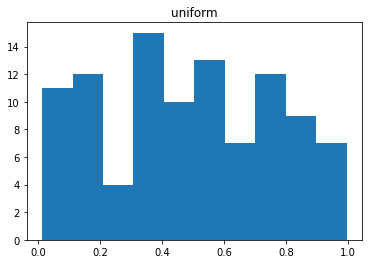

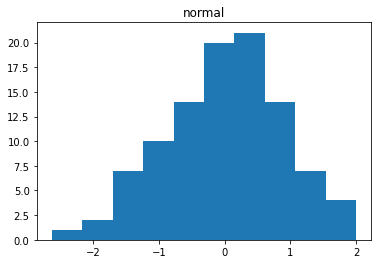

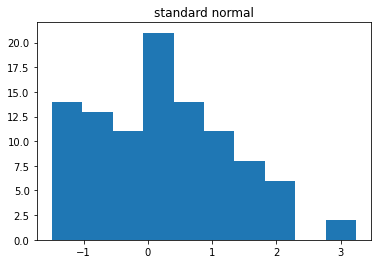

In [49]:
import matplotlib.pyplot as plt

# 균등분포
uniform = np.random.uniform(size=100)
plt.hist(uniform)
plt.title('uniform')
plt.show()

# 정규분포
normal = np.random.normal(size=100)
plt.hist(normal)
plt.title('normal')
plt.show()

# 표준정규분포 N(0,1)
rand_norm = np.random.randn(100)
plt.hist(rand_norm)
plt.title('standard normal')
plt.show()

## 3️⃣ Operation function
- sum
- axis : 기준이 되는 축!!!
- sorting
- mathematical functions
  - 지수함수
  - 삼각함수
  - Hyperbolic : sinh, cosh, tanh 등
- concatenate : 배열 합치는 함수
  - np.vstack() / np.hstack()
  - np.concatenate()


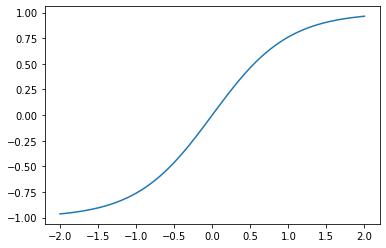

In [50]:
import matplotlib.pyplot as plt

y = np.tanh(x)
plt.plot(x, y)
plt.show()

In [51]:
# 밑이 자연상수 e인 지수함수
print(np.exp(0))

1.0


## 4️⃣ Vector, Matrix, Tensor

In [52]:
# Sum & Axis

# Vector
v = np.arange(1,11)
print(v.sum())
print('='*20)



# Matrix
# 원소의 총 합
m = np.arange(1,13).reshape(3,4)
print(m.sum())
# 축을 이용한 일부 원소의 합
# 로우의 합: 컬럼의 합: axis = 0
print(f'axis=0 합: {m.sum(axis=0)}')
# 컬럼의 합: 행의 합: axis = 1
print(f'axis=1 : {m.sum(axis=1)}')
print('='*20)



# Tensor
t = np.arange(1, 25).reshape(2,3,4)
print('   [ 예  시  ]  ')
print(t)
print('='*20)
print(f'axis=0 : {t.sum(axis=0)}')
print(f'axis=1 : {t.sum(axis=1)}')
print('='*20)

55
78
axis=0 합: [15 18 21 24]
axis=1 : [10 26 42]
   [ 예  시  ]  
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]
axis=0 : [[14 16 18 20]
 [22 24 26 28]
 [30 32 34 36]]
axis=1 : [[15 18 21 24]
 [51 54 57 60]]


In [53]:
# sorting
# 기본
print('='*10, 'Vector', '='*10)
a = [4,3,5,7]
print('정렬 전: ', a)
print('정렬 후: ', np.sort(a))

# Matrix
print('='*10, 'Matrix', '='*10)
m = np.array([[4,3,5,7],[1,12,11,9],[2,5,1,14]])
print('정렬 전:(axis=1)\n', m)
print('정렬 후:(axis=1, default)\n', np.sort(m)) # default: axis=1
print('정렬 후:(axis=0)\n', np.sort(m, axis=0))
print('='*27)

========== Vector ==========
정렬 전:  [4, 3, 5, 7]
정렬 후:  [3 4 5 7]
========== Matrix ==========
정렬 전:(axis=1)
 [[ 4  3  5  7]
 [ 1 12 11  9]
 [ 2  5  1 14]]
정렬 후:(axis=1, default)
 [[ 3  4  5  7]
 [ 1  9 11 12]
 [ 1  2  5 14]]
정렬 후:(axis=0)
 [[ 1  3  1  7]
 [ 2  5  5  9]
 [ 4 12 11 14]]


In [54]:
# argsort(): 소팅 인덱스를 가져오는 함수
a = np.array([42,38,12,25])
indices = np.argsort(a)
print(indices)
print(a[indices]) # 정렬 결과를 값으로 표현하기
print(a[indices][::-1]) # 정렬 전으로 되돌리기

[2 3 1 0]
[12 25 38 42]
[42 38 25 12]


In [55]:
# 통계, 수학 함수
a = np.arange(1, 13).reshape(3,4)

# 총합
print('='*10, '총합', '='*10)
print(a.sum())


# 평균
print('='*10, '평균', '='*10)
print('전체: ', a.mean())
print('axis=0: ', a.mean(axis=0))
print('axis=1: ', a.mean(axis=1))

# 분산
print('='*10, '분산', '='*10)
print(a.var())

# 표준편차
print('='*10, '표준편차', '='*10)
print(a.std())

========== 총합 ==========
78
========== 평균 ==========
전체:  6.5
axis=0:  [5. 6. 7. 8.]
axis=1:  [ 2.5  6.5 10.5]
========== 분산 ==========
11.916666666666666
========== 표준편차 ==========
3.452052529534663


In [56]:
# concatenate
a = np.arange(1,5).reshape(2,2) # 2차원
b = np.arange(5,7).reshape(1,2) # 1차원
print('='*10, '붙일놈 1', '='*10)
print(a)
print('='*10, '붙일놈 2', '='*10)
print(b)

print('='*10, 'concatenate(axis=0)', '='*10)
print(np.concatenate((a,b), axis=0))
print('='*10, 'concatenate(axis=1)', '='*10)
print('     ValueError - transpose 필요\n')

# 전치행렬
b_t = b.T # (1,2) -> (2,1)
print('='*10, '붙일놈 2 - 전치행렬 적용', '='*10)
print(b_t)
print('='*10, 'Transpose 후 hstack', '='*10)
print(np.hstack((a,b_t)))

========== 붙일놈 1 ==========
[[1 2]
 [3 4]]
========== 붙일놈 2 ==========
[[5 6]]
========== concatenate(axis=0) ==========
[[1 2]
 [3 4]
 [5 6]]
========== concatenate(axis=1) ==========
     ValueError - transpose 필요

========== 붙일놈 2 - 전치행렬 적용 ==========
[[5]
 [6]]
========== Transpose 후 hstack ==========
[[1 2 5]
 [3 4 6]]


## 5️⃣ Array operation
- 행렬간 자릿수대로 기본적인 사칙연산 가능!
- ⭐️ 내적 ( Dot product )
  - array1.dot ( array2 )
  - array1의 행수와 array2의 열수가 일치해야함
  - 예 ) (2,3) dot (3,2) ==> (2,2)
- Transpose ( )
- Broadcasting : shape이 다른 배열간 연산 지원
  - Scalar : Vector의 원소
    - 예 ) scalar = 3
    - array + scalar = array의 전체 원소에 3을 더함
  - Matrix와 Vector간의 연산도 가능
    - 한 축의 길이가 서로 같아야 하는듯?

In [57]:
# 기본 연산
a = np.arange(1,7).reshape(2,3)
print('a:\n', a)
print('a + a:\n', a + a)

a:
 [[1 2 3]
 [4 5 6]]
a + a:
 [[ 2  4  6]
 [ 8 10 12]]


In [58]:
# dot product (내적) - 더 중요
print('a:\n', a)
print('a.T:\n', a.T)
print('Dot product:\n', np.dot(a, a.T))

a:
 [[1 2 3]
 [4 5 6]]
a.T:
 [[1 4]
 [2 5]
 [3 6]]
Dot product:
 [[14 32]
 [32 77]]


In [59]:
# Broadcasting
# scalar = 3
print('-'*10)

b = np.array([10,20,30])

print('a:\n', a)
print('b:\n', b)
print('-'*10)
print('a + 3:\n', a+3)
print('a // 3:\n', a//3)
print('a % 3:\n', a%3)
print('a + b:\n', a + b)

print('-'*10)

----------
a:
 [[1 2 3]
 [4 5 6]]
b:
 [10 20 30]
----------
a + 3:
 [[4 5 6]
 [7 8 9]]
a // 3:
 [[0 0 1]
 [1 1 2]]
a % 3:
 [[1 2 0]
 [1 2 0]]
a + b:
 [[11 22 33]
 [14 25 36]]
----------


## 6️⃣ Comparison
- 배열의 크기가 동일할 때 원소간 비교 가능
  - any & all
    - any : 하나라도 조건에 만족하면 True
    - all : 모두가 조건을 만족해야 True
    - 예 ) (test_a > test_b).any()
  - Logical operation
    - np.logical_and()
      - 예 ) np.logical_and(a>0, a\<3)
    - np.logical_not(array)
    - np.logical_or(array)
    - np.where(array)
    - np.isnan(array)
  - ⭐️ argmax & argmin : array내 최대값 또는 최소값의 index를 리턴
    - 이미지 분석에 많이 쓰임 : 확률값이 제일 높은 것들의 인덱스를 뽑으면 그게 어떤 사물(?)인지 알 수 있음





In [60]:
a = np.arange(8)
print('a: ', a)
print('a > 4: ', a>4)
print(np.all(a>4))
print(np.any(a>4))

a:  [0 1 2 3 4 5 6 7]
a > 4:  [False False False False False  True  True  True]
False
True


In [61]:
x = np.array([1,3,0])
y = np.array([4,5,6])
print(x > y)
print(x == y)

[False False False]
[False False False]


In [62]:
a = np.array([1,3,0], float)
b = np.logical_and(a>0, a<3) # 0 < a < 3
c = np.logical_not(b)
print('a: ', a)
print('np.logical_and(a>0, a<3): ', b)
print('np.logical_not(b): ', c)
print('np.logical_or(b, c): ', np.logical_or(b, c))

# XOR도 가능
print('xor: ', np.logical_xor(b,c))

a:  [1. 3. 0.]
np.logical_and(a>0, a<3):  [ True False False]
np.logical_not(b):  [False  True  True]
np.logical_or(b, c):  [ True  True  True]
xor:  [ True  True  True]


In [63]:
# where 1: where(조건, true일 경우의 값, false인 경우의 값)
np.where(a>1, 10, 0)
# where 2: 참인경우 index값을 반환
np.where(np.arange(10,20)>15)

(array([6, 7, 8, 9]),)

In [64]:
a = np.array([np.Inf, np.NaN, 1, np.nan, np.inf, np.NaN])
print('a: ', a)
print('np.isnan(a): ', np.isnan(a))
print('np.isinf(a): ', np.isinf(a))

a:  [inf nan  1. nan inf nan]
np.isnan(a):  [False  True False  True False  True]
np.isinf(a):  [ True False False False  True False]


In [65]:
# argmax, argmin
a = np.array([1,2,4,5,8,78,23,3])
print('a: ', a)
print('np.argmax(a): ', np.argmax(a)) # 최댓값인 5의 인덱스를 반환
print('np.argmin(a): ', np.argmin(a)) # 최솟값인 1의 인덱스를 반환

a:  [ 1  2  4  5  8 78 23  3]
np.argmax(a):  5
np.argmin(a):  0


In [66]:
# 아래의 함수는 차원을 무시하기 때문에 위와 동일한 결과를 얻음.
b = a.reshape(2, -1)
print('b:\n', b)
print('np.argmax(a): ', np.argmax(b))
print('np.argmin(a): ', np.argmin(b))

# 해결방안: 기준축을 제시
print('np.argmax(a, axis=1): ', np.argmax(b, axis=1))
print('np.argmin(a, axis=0): ', np.argmin(b, axis=0))

b:
 [[ 1  2  4  5]
 [ 8 78 23  3]]
np.argmax(a):  5
np.argmin(a):  0
np.argmax(a, axis=1):  [3 1]
np.argmin(a, axis=0):  [0 0 0 1]


## 7️⃣ Boolean & fancy index
- Boolean index : 조건이 True인 index만 추출
- fancy index
  - 반드시 integer로 선언
  - array1[array2]
    - array2의 값을 인덱스로 하여 array1의 값들을 추출함
  - array1[array2, array3]
    - array2를 row index, array3을 column index로 변환하여 표시



In [67]:
# Boolean indexing
a = np.array([1,2,4,5,8,78,23,3])
print(a[a > 4])

[ 5  8 78 23]


In [68]:
# Fancy indexing - Vector
a = np.array([2,4,6,8])
b = np.array([1,3,2,0,0,1,3]) # 없는 인덱스값을 넣으면 IndexError 발생
print(a[b])

[4 8 6 2 2 4 8]


In [69]:
# Fancy indexing - Matrix
a = np.arange(1,13).reshape(3,4)
b = np.array([1,2,0,1])
c = np.array([2,1,3,0])
print('a:\n', a)
print('b:\n', b)
print('c:\n', c)
print('a[b,c]:\n', a[b,c])
# a[1,2] = 7
# a[2,1] = 10
# a[0,3] = 4
# a[1,0] = 5

a:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
b:
 [1 2 0 1]
c:
 [2 1 3 0]
a[b,c]:
 [ 7 10  4  5]


## 8️⃣ 기술통계
- 표본평균 : np.mean()
- 표본분산
  - np.var(x) : 모분산, 분모가 n
  - np.var(x, ddof=1) : 표본분산, 분모가 n-1
- 표본표준편차 : np.std()
- 최대값, 최소값 : np.max(), np.min()
- 중앙값 : np.median()
- 사분위수(quartile)
  - np.percentile(x, 0) : 최소값
  - np.percentile(x, 25) : 1사분위 수
  - np.percentile(x, 50) : 2사분위 수
  - np.percentile(x, 75) : 3사분위 수
  - np.percentile(x, 100) : 최대값

==================== 사분위수 ====================
최소값:  1.0
1분위:  2639.25
2분위:  5066.0
3분위:  7568.75
최대값:  9975.0
------------------------------------------------


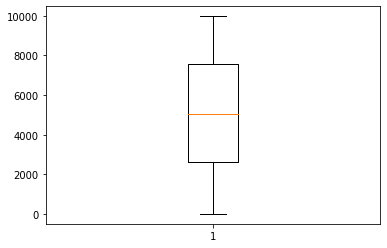

In [70]:
# 사분위수
a = np.random.randint(1, 10000, 1000)
print('='*20, '사분위수', '='*20)
print('최소값: ', np.percentile(a, 0))
print('1분위: ', np.percentile(a, 25))
print('2분위: ', np.percentile(a, 50))
print('3분위: ', np.percentile(a, 75))
print('최대값: ', np.percentile(a, 100))
print('-'*48)

# 시각화
plt.boxplot(a)
plt.show()

## 📚 퀴즈

In [71]:
# 문제 1
import numpy as np
a = np.arange(1, 9).reshape(2,4)*10
print(a)

[[10 20 30 40]
 [50 60 70 80]]


In [72]:
# 문제 2
m = np.arange(15).reshape(3,5)
# 1) 값 7을 인덱싱
print(m[1, 2])

# 2) 값 14을 인덱싱
print(m[-1, -1])

# 3) 배열 [6, 7]을 슬라이싱
print(m[1, 1:3])

# 4) 배열 [7, 12]을 슬라이싱
print(m[1:, 2])

# 5) 배열 [[3,4], [8,9]] 을 슬라이싱
print(m[:-1, 3:])

7
14
[6 7]
[ 7 12]
[[3 4]
 [8 9]]


In [73]:
# 문제 3
f = m.flatten()
print('f: ', f)
# 1) 이 배열에서 3의 배수를 찾기
# result = [ i for i in f if i%3==0 and i!=0 ]
result = f[f%3==0]
print(result)
# 2) 이 배열에서 4로 나누면 1이 남는 수를 찾기
# result = [ i for i in f if i%4==1 ]
result = f[f%4==1]
print(result)
# 3) 이 배열에서 3으로 나누면 나누어지고 4로 나누면 1이 남는 수를 찾기
# result = [ i for i in f if i%3==0 and i%4==1 and i!=0]
result = f[np.logical_and(f%3==0,f%4==1)]
print(result)

f:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  3  6  9 12]
[ 1  5  9 13]
[9]


In [74]:
# 문제 4
a1 = np.eye(5)*2
a2 = np.eye(5, k=1)
a3 = np.eye(5, k=-1)*3
a = a1 + a2 + a3
print(a)

[[2. 1. 0. 0. 0.]
 [3. 2. 1. 0. 0.]
 [0. 3. 2. 1. 0.]
 [0. 0. 3. 2. 1.]
 [0. 0. 0. 3. 2.]]


In [75]:
# 문제 5
import random
np.random.seed(2023)
# a = []
# [ a.append(round(random.uniform(0, 10), 4)) for i in range(30) ]
# a = np.array(a).reshape(5,6)

m = np.random.uniform(0,10,30).reshape(5,6).round(4)

print(m)

# 1) 전체의 최댓값
max = np.max(m)
print('max: ', max)
# 2) 각 행의 합
print('sum of rows: ', np.sum(m, axis=1))
# 3) 각 행의 최댓값
print('max of rows: ', np.max(m, axis=1))
# 4) 각 열의 평균
print('mean of columns: ', np.mean(m, axis=0))
# 5) 각 열의 최솟값
print('min of columns: ', np.min(m, axis=0))

# 느낀점: 결과적으로 행 열 단위 통계낼때 실제로 어떤방향의 값들을 기준으로 내는지 보기

[[3.2199 8.9042 5.8805 1.266  1.4134 4.679 ]
 [0.2209 7.2727 5.2439 5.4494 4.5637 5.0138]
 [3.9447 1.5117 3.6088 1.6208 3.3796 1.8032]
 [3.9099 0.3565 5.6486 2.0346 3.206  3.7656]
 [1.8405 1.0395 4.5493 1.9586 3.7853 9.3053]]
max:  9.3053
sum of rows:  [25.363  27.7644 15.8688 18.9212 22.4785]
max of rows:  [8.9042 7.2727 3.9447 5.6486 9.3053]
mean of columns:  [2.62718 3.81692 4.98622 2.46588 3.2696  4.91338]
min of columns:  [0.2209 0.3565 3.6088 1.266  1.4134 1.8032]


In [76]:
# 문제 6
a = np.array([[1,2,3,4], [46,99,100,71], [81,59,90,100]])
eng_sorted = np.argsort(a[1])
# result = a.copy()
# for i in range(3):
#   for j in range(4):
#     result[i][j] = a[i][eng_sorted[j]]
# print(eng_sorted)
# print(result)

# 내림차순 
print(a[:, np.argsort(a[1])[::-1]])
# 느낀점: 반복문 안에서 리스트를 직접 바꾸려고 하지 맙시다(반복문을 도는 동시에 속에서 값 바뀌어서 꼬임)

[[  3   2   4   1]
 [100  99  71  46]
 [ 90  59 100  81]]


In [77]:
# 문제 7
np.random.seed(2023)
# dice = range(1,6+1)
# dices_100 = np.array(random.choices(dice, k=100))
# print(dices_100.mean())

dic = np.random.randint(1, 7, 100)
mean = np.mean(dic)
print(mean)

3.6


In [78]:
# unique() : 중복제거 - set보다 많이씀
np.unique(dic) # set([1,1,2,2,3,3] ==> [1,2,3]) 과 같음


array([1, 2, 3, 4, 5, 6])

In [83]:
# 문제 8 : 시드값 주셈, 초기값 10,000, normalize, sample(250)
price = 10000
np.random.seed(2023)
rate1 = np.random.normal(loc=0.0, scale=0.01, size=250)

earning = price * rate1
result = price + earning

print('='*50)
print(result)

# 느낀점: 퍼센트를 조심합시다!

[10071.16735303  9967.55150439  9899.81293613 10023.6250794
  9989.78401587  9885.87073746 10265.44072609 10144.06051935
 10009.89022704  9687.84678469  9892.34783546  9967.43180423
  9896.45021245  9957.3679621   9897.06386047  9947.82257957
  9957.72424324  9990.07558253  9861.97419867 10030.19028161
  9896.64006772  9849.78224769  9862.04066002  9979.55451827
 10064.21249444  9981.88244691 10077.17491623 10074.15234835
 10132.47627338 10043.92867111  9944.21265031 10092.70795762
  9939.9273408   9848.02515669 10209.73291882 10089.2561957
 10159.64876984  9936.12379405  9886.69527521 10065.65969451
 10059.57867415  9918.88803541  9969.94653288 10100.83912015
  9891.22376514  9821.29205312 10034.06187879  9874.64986476
 10037.07879453 10045.525376    9771.62798832  9999.91779969
 10239.88759831  9741.68951399 10131.10088438  9842.05224921
  9915.93173886  9983.44906012  9793.15896216 10045.27387418
 10005.11316257  9976.19392524  9979.19910178 10040.13041102
 10018.31690628 10123.5830

In [80]:
price_list = []
earning2 = []
np.random.seed(2023)
price = 10000
rate2 = np.random.normal(0, 0.01, 250)
for i in range(250):
  earning2.append(price*rate2[i])
  price = price + (price*rate2[i])
  price_list.append(price)



print(earning2)
print('='*50)
# print(price_list)

[71.16735302628457, -32.67942296338621, -100.57266313671616, 23.478403728166725, -10.176543964679754, -113.57250720807806, 261.13115308587123, 145.48348826195314, 10.131804991903966, -320.09411422590455, -106.94485700214436, -32.0059126919121, -101.43060161165927, -41.32713764275918, -99.36001908000414, -49.846281592492986, -40.17626718690913, -9.391680565902565, -130.48702798191354, 28.147387266730057, -96.65677765708111, -139.0237924328535, -125.76089213511113, -18.380555727710583, 57.609218855535545, -16.358812919183936, 69.55700294989022, 67.34857337153035, 121.21325346105492, 40.7263666251873, -51.94777495934958, 85.84571796314138, -56.141781206399614, -141.17709604055767, 191.87053667737467, 83.36705173999636, 150.44605265754151, -61.155148846657845, -107.78514965654344, 61.75340589379534, 56.40208195097101, -77.24475728944527, -28.388448769224944, 94.96617746780056, -103.47403524654531, -168.14782570651954, 31.476368088348817, -116.22982877901671, 33.95002535075869, 41.838429258